### Numerical Methods for Solving Differential Equations

This notebook explores various numerical methods to approximate solutions for differential equations, particularly when analytical solutions are challenging or impossible to obtain.

#### Methods Overview:
- **Euler Method**: A simple and direct approach, suitable for basic problems but may lack accuracy and stability for complex or stiff equations.
- **Improved Euler Method (Heun's Method)**: Enhances accuracy by averaging slopes at the interval's start and end, offering a balance between simplicity and precision.
- **Runge-Kutta Method**: A highly accurate, fourth-order method that provides reliable results for a wide range of problems, though it is more computationally intensive.

These methods are implemented within the `ODEs` class, allowing for flexible application and comparison of results. Custom functions can also be used to handle more complex, nonlinear systems.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

class ODEs:
    
    def __init__(self, x_i, y_i, omega, function=None):
        """
        Initialize the ODEs solver with initial values and equation parameters.
        
        Args:
            x_i (float): Initial x value.
            y_i (array): Initial y values (array to accommodate system of ODEs).
            omega (float): Parameter for the default ODE function.
            function (callable, optional): Custom function representing the system of ODEs.
        """

        self.x_values = [x_i]
        self.y_values = [np.array(y_i)]
        self.omega = omega
        self.function = function if function is not None else self.default_function

    def default_function(self, x, y):
        """
        Default ODE function for a harmonic oscillator.
        
        Args:
            x (float): Current x value.
            y (array): Current y values.
        
        Returns:
            deriv (array): Array of derivative values.
        """
        
        deriv = np.zeros(2)
        deriv[0] = y[1]
        deriv[1] = -self.omega**2 * y[0]
        return deriv
    
    def euler_method(self, step_size):
        """
        Euler method for solving ODEs.
        
        Args:
            step_size (float): Step size for the Euler method.
        
        Returns:
            x_values (array): Array of x values.
            y_values (array): Array of y values.
        """

        x_vals = self.x_values[:]
        y_vals = self.y_values[:]
        
        for _ in np.arange(0, 3, step_size):
            x_vals.append(x_vals[-1] + step_size)
            y_vals.append(y_vals[-1] + step_size * self.function(x_vals[-1], y_vals[-1]))
        
        return np.array(x_vals), np.array(y_vals)
    
    def improved_euler_method(self, step_size):
        """
        Improved Euler method (Heun's method) for solving ODEs.
        
        Args:
            step_size (float): Step size for the improved Euler method.
        
        Returns:
            x_values (array): Array of x values.
            y_values (array): Array of y values.
        """

        x_vals = self.x_values[:]
        y_vals = self.y_values[:]
        
        for _ in np.arange(0, 3, step_size):
            x_next = x_vals[-1] + step_size
            y_predict = y_vals[-1] + step_size * self.function(x_vals[-1], y_vals[-1])
            y_correct = y_vals[-1] + step_size / 2 * (self.function(x_vals[-1], y_vals[-1]) + self.function(x_next, y_predict))
            x_vals.append(x_next)
            y_vals.append(y_correct)
        
        return np.array(x_vals), np.array(y_vals)
    
    def modified_euler_method(self, step_size):
        """
        Modified Euler method (Midpoint method) for solving ODEs.
        
        Args:
            step_size (float): Step size for the modified Euler method.
        
        Returns:
            x_values (array): Array of x values.
            y_values (array): Array of y values.
        """

        x_vals = self.x_values[:]
        y_vals = self.y_values[:]
        
        for _ in np.arange(0, 3, step_size):
            x_next = x_vals[-1] + step_size
            y_mid = y_vals[-1] + step_size / 2 * self.function(x_vals[-1], y_vals[-1])
            y_next = y_vals[-1] + step_size * self.function(x_vals[-1] + step_size / 2, y_mid)
            x_vals.append(x_next)
            y_vals.append(y_next)
        
        return np.array(x_vals), np.array(y_vals)
    
    def runge_kutta_method(self, step_size):
        """
        Runge-Kutta method of 4th order for solving ODEs.
        
        Args:
            step_size (float): Step size for the Runge-Kutta method.
        
        Returns:
            x_values (array): Array of x values.
            y_values (array): Array of y values.
        """
        
        x_vals = self.x_values[:]
        y_vals = self.y_values[:]
        
        for _ in np.arange(0, 3, step_size):
            k1 = self.function(x_vals[-1], y_vals[-1])
            k2 = self.function(x_vals[-1] + step_size / 2, y_vals[-1] + step_size / 2 * k1)
            k3 = self.function(x_vals[-1] + step_size / 2, y_vals[-1] + step_size / 2 * k2)
            k4 = self.function(x_vals[-1] + step_size, y_vals[-1] + step_size * k3)
            
            x_vals.append(x_vals[-1] + step_size)
            y_vals.append(y_vals[-1] + step_size / 6 * (k1 + 2*k2 + 2*k3 + k4))
        
        return np.array(x_vals), np.array(y_vals)


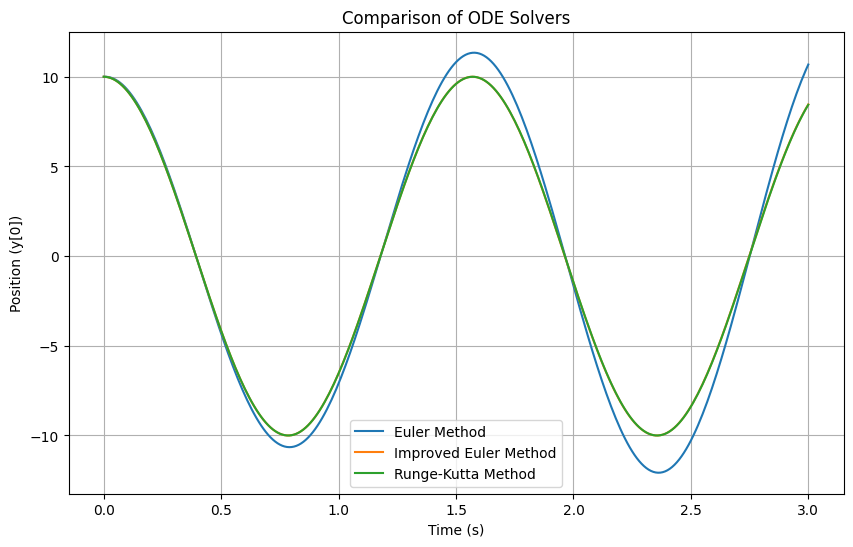

In [6]:
# Example setup
y_initial = np.array([10.0, 0.0])
omega_value = 4.0

# Create ODE solver instances
ode_solver = ODEs(0.0, y_initial, omega_value)

# Solve using different methods
x_euler, y_euler = ode_solver.euler_method(0.01)
x_improved_euler, y_improved_euler = ode_solver.improved_euler_method(0.01)
x_runge_kutta, y_runge_kutta = ode_solver.runge_kutta_method(0.01)

# Plotting results
plt.figure(figsize=(10, 6))

plt.plot(x_euler, [y[0] for y in y_euler], label="Euler Method")
plt.plot(x_improved_euler, [y[0] for y in y_improved_euler], label="Improved Euler Method")
plt.plot(x_runge_kutta, [y[0] for y in y_runge_kutta], label="Runge-Kutta Method")

plt.title("Comparison of ODE Solvers")
plt.xlabel("Time (s)")
plt.ylabel("Position (y[0])")
plt.legend()
plt.grid(True)
plt.show()